In [3]:
import pandas as pd
df=pd.read_excel('data_science_analytics_source.xlsx', sheet_name='data') 

#data.set_index('Date',inplace=True
#df.count()
# InvoiceNo      541909
# StockCode      541909
# Description    541909
# Quantity       541909
# InvoiceDate    541909
# UnitPrice      541909
# CustomerID     406829 has some null values
# Country        541909


#df2=df.loc[df['CustomerID'] != NaN]


In [4]:
df['CustomerID'].fillna(0, inplace=True)
# drop all the rows that has customer_id as 0
df=df.drop(df[df.CustomerID==0].index)

print(df[df['Quantity']==-1510])  # check if customerid with 0 is present...
print(df.count())

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64


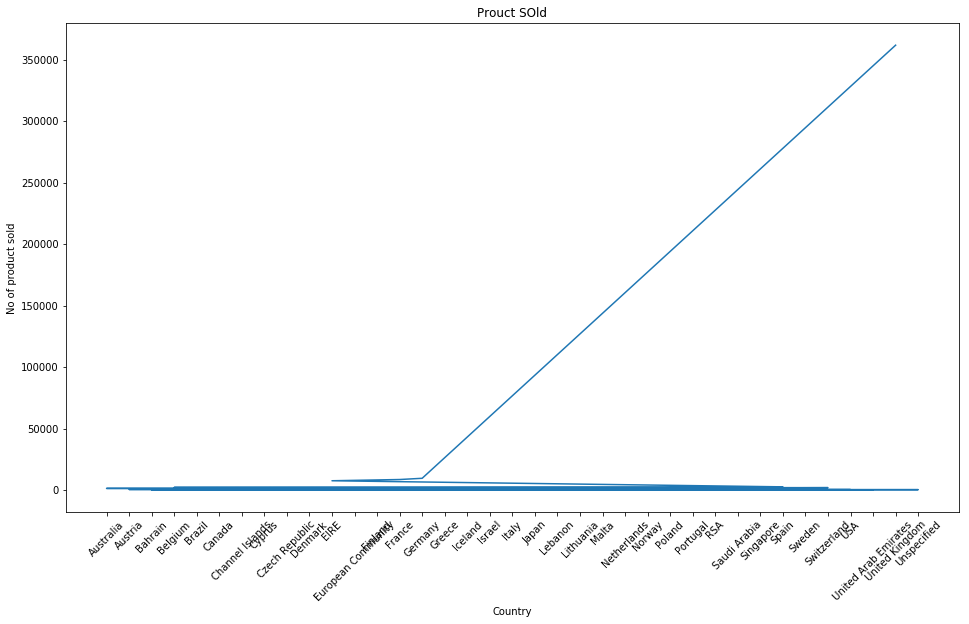

In [5]:
df_country_count=pd.DataFrame(df['Country'].value_counts())
df_country_count.reset_index(level=0, inplace=True)

df_country_count.rename(columns={'index': 'Countrys', 'Country':'Count'},inplace=True)

X=df_country_count['Countrys'].tolist()
Y=df_country_count['Count'].tolist()
#index=df_country_count.index


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
fig = plt.figure()
#ax = plt.axes()
#plt.xticks(X)
plt.plot(X,Y)
plt.xlabel('Country')
# add a label to the y axis
plt.ylabel('No of product sold')
# add a title
plt.title('Prouct SOld')

# rotate the tick labels for the x axis
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
plt.show()

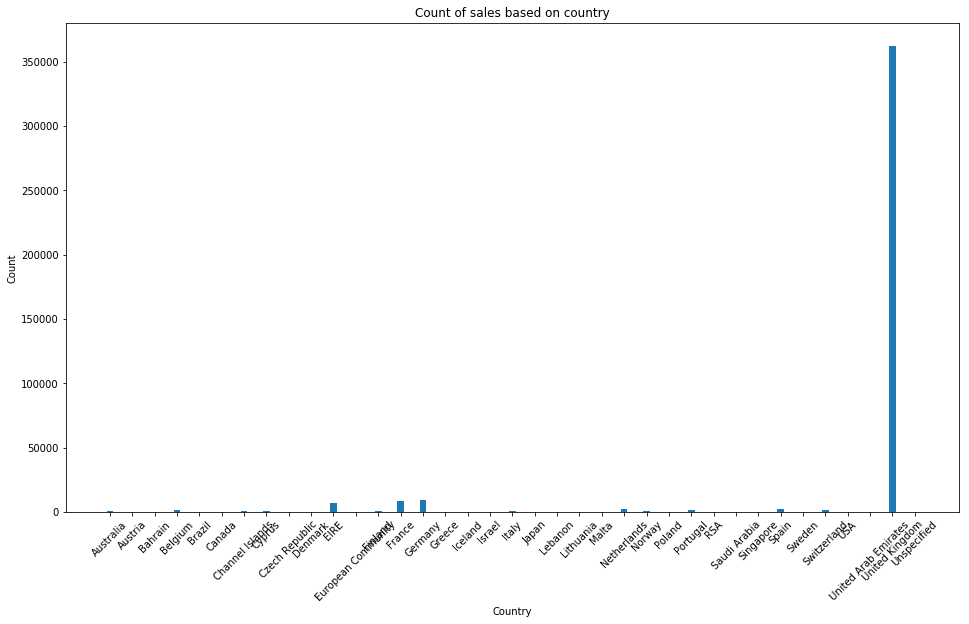

In [6]:
# representing the data in bar chart for whole data
plt.figure()
#xvals = range(len(linear_data))
#plt.xlabel('The number of times the child kicked a ball')
plt.bar(X, Y, width = 0.3)
x = plt.gca().xaxis
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of sales based on country')
plt.show()

# since the output has huge varition, the next chart will show excluding the high value of UK data from df


# Find the top 10 country that has maximum sales and show in chart

         Countrys   Count
0  United Kingdom  361878
1         Germany    9495
2          France    8491
3            EIRE    7485
4           Spain    2533
5     Netherlands    2371
6         Belgium    2069
7     Switzerland    1877
8        Portugal    1480
9       Australia    1259


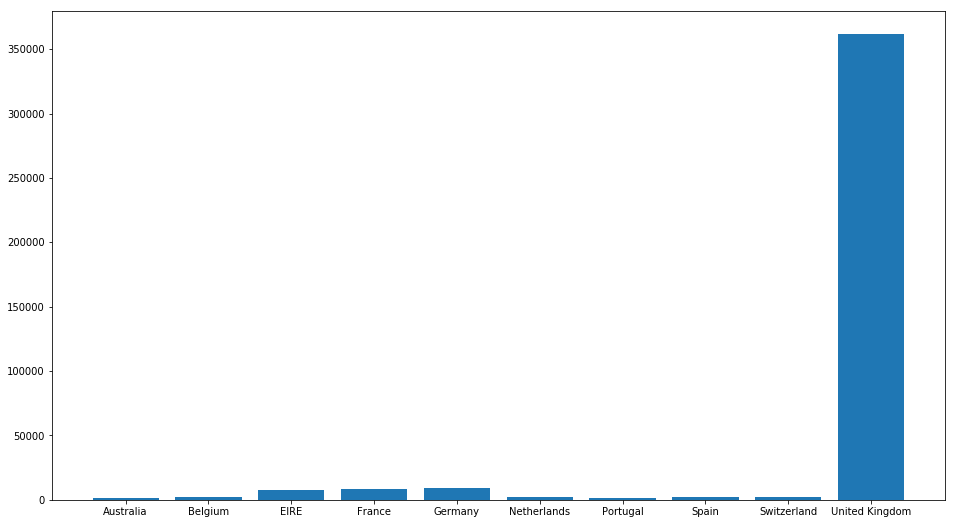

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
fig = plt.figure()

Top_10_sales_country=df_country_count.head(10)
print(Top_10_sales_country)
X=Top_10_sales_country['Countrys'].tolist()
Y=Top_10_sales_country['Count'].tolist()
plt.bar(X,Y)
plt.show()




#Exclude the united kingdom and look the rest.
# create histogram for x as days(sunday,monday etc to find which day has how many sales 

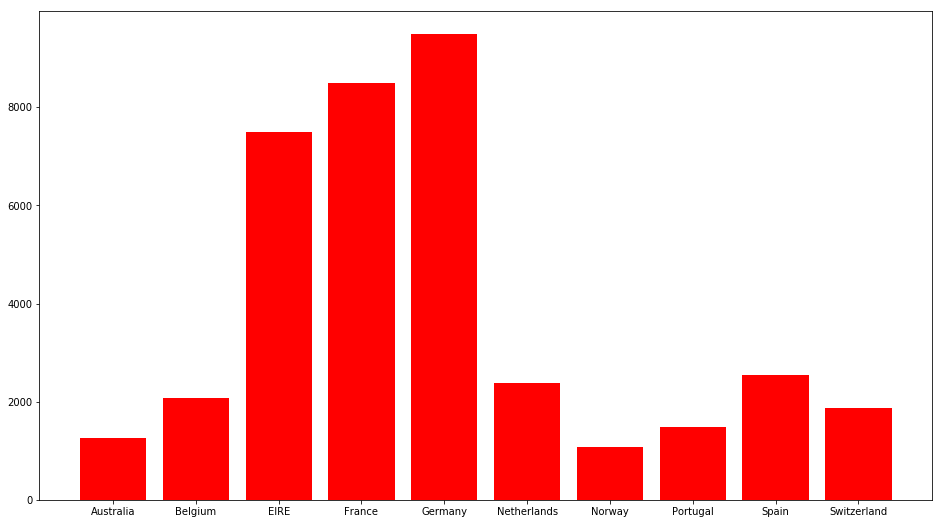

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
fig = plt.figure()

data=df_country_count.loc[1:10]

X=data['Countrys'].tolist()
Y=data['Count'].tolist()
plt.bar(X,Y,color='r')
plt.show()

C:\Users\ERC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ERC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


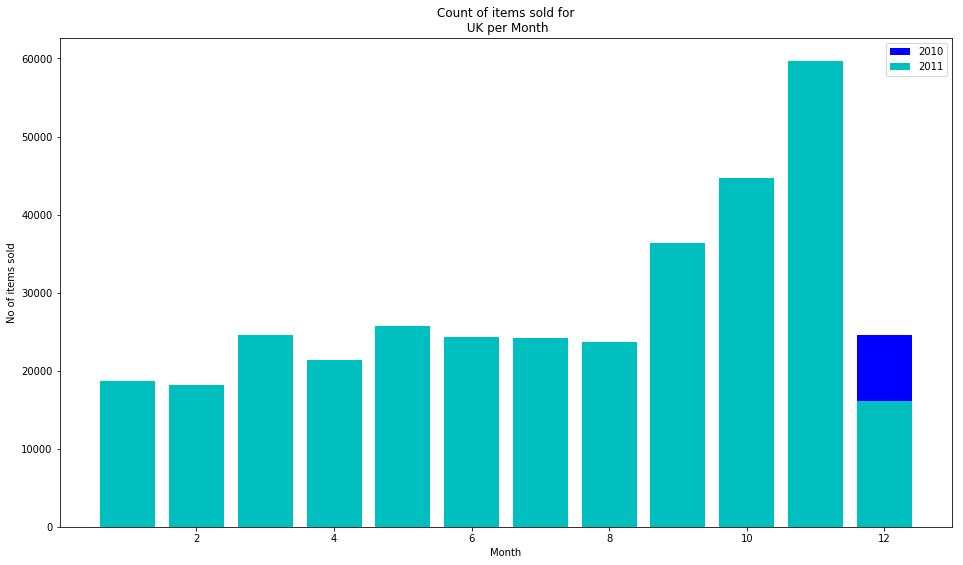

In [174]:
#new df for handlind uk only
df_uk=df[df['Country']=='United Kingdom']
# adding year and month column in df
df_uk['year'] = pd.DatetimeIndex(df_uk['InvoiceDate']).year
df_uk['month'] = pd.DatetimeIndex(df_uk['InvoiceDate']).month
## number of items sold in each month in each group
df_gp=df_uk.groupby(['year','month']).size()
#df_gp has multible level index,, next we convert multilevel index to single index
#df_gp.swaplevel()
#df_gp.index
#df_gp
df_gp.unstack(level=0)
newdf=df_gp.unstack(level=0)
#after index conversion, we get some nan value, convet them ot 0 
newdf[2010].fillna(0, inplace=True)
#print(newdf)
# plot start
import matplotlib.pyplot as plt
y1=[i for i in newdf[2010]]
y2=[i for i in newdf[2011]]
x=list(range(1,13))
plt.bar(x,y1,color='b',label='2010')
plt.bar(x,y2,color='c',label='2011')
plt.legend()
plt.xlabel('Month')
plt.ylabel('No of items sold')
plt.title('Count of items sold for\n UK per Month')
plt.show()




[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 24536.0]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


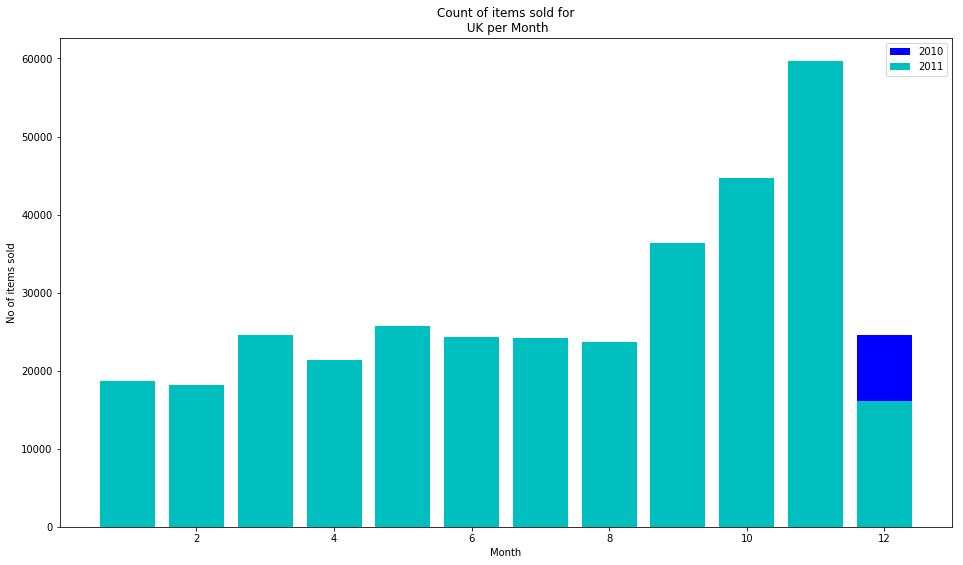

In [172]:
df_gp=df_uk.groupby(['year','month']).size()
df_gp.swaplevel()
df_gp.index
#df_gp
df_gp.unstack(level=0)
newdf=df_gp.unstack(level=0)
newdf[2010].fillna(0, inplace=True)
#print(newdf)
import matplotlib.pyplot as plt
y1=[i for i in newdf[2010]]
y2=[i for i in newdf[2011]]
x=list(range(1,13))
print(x)
print(y1)
print(x)
plt.bar(x,y1,color='b',label='2010')
plt.bar(x,y2,color='c',label='2011')
plt.legend()
plt.xlabel('Month')
plt.ylabel('No of items sold')
plt.title('Count of items sold for\n UK per Month')
plt.show()



In [103]:
grouped=df_uk.groupby(['year','month']).count()
#print(grp)
count_of_records_year_month=grouped['InvoiceNo']
grpd=pd.DataFrame(count_of_records_year_month)
#print(type(grpd))
print(grpd.index)


MultiIndex(levels=[[2010, 2011], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]],
           labels=[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           names=['year', 'month'])


In [77]:
df_uk.groupby(['year','month']).groups.keys()

dict_keys([(2010, 12), (2011, 1), (2011, 2), (2011, 3), (2011, 4), (2011, 5), (2011, 6), (2011, 7), (2011, 8), (2011, 9), (2011, 10), (2011, 11), (2011, 12)])